In [1]:
import numpy as np
import pandas as pd 

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style('grade3')

# Familiarization task – 1 A4 

In [2]:
training_data_noattack = pd.read_csv('./BATADAL_dataset03.csv')
training_data_attack = pd.read_csv('./BATADAL_dataset04.csv')
test_data = pd.read_csv('./BATADAL_test_dataset.csv')

In [3]:
# to print some samples
training_data_noattack.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [4]:
# to drop DATETIME and ATT_FLAG
new_training_data_noattack = training_data_noattack.copy()
new_training_data_noattack = new_training_data_noattack.drop(columns=['DATETIME', 'ATT_FLAG'])

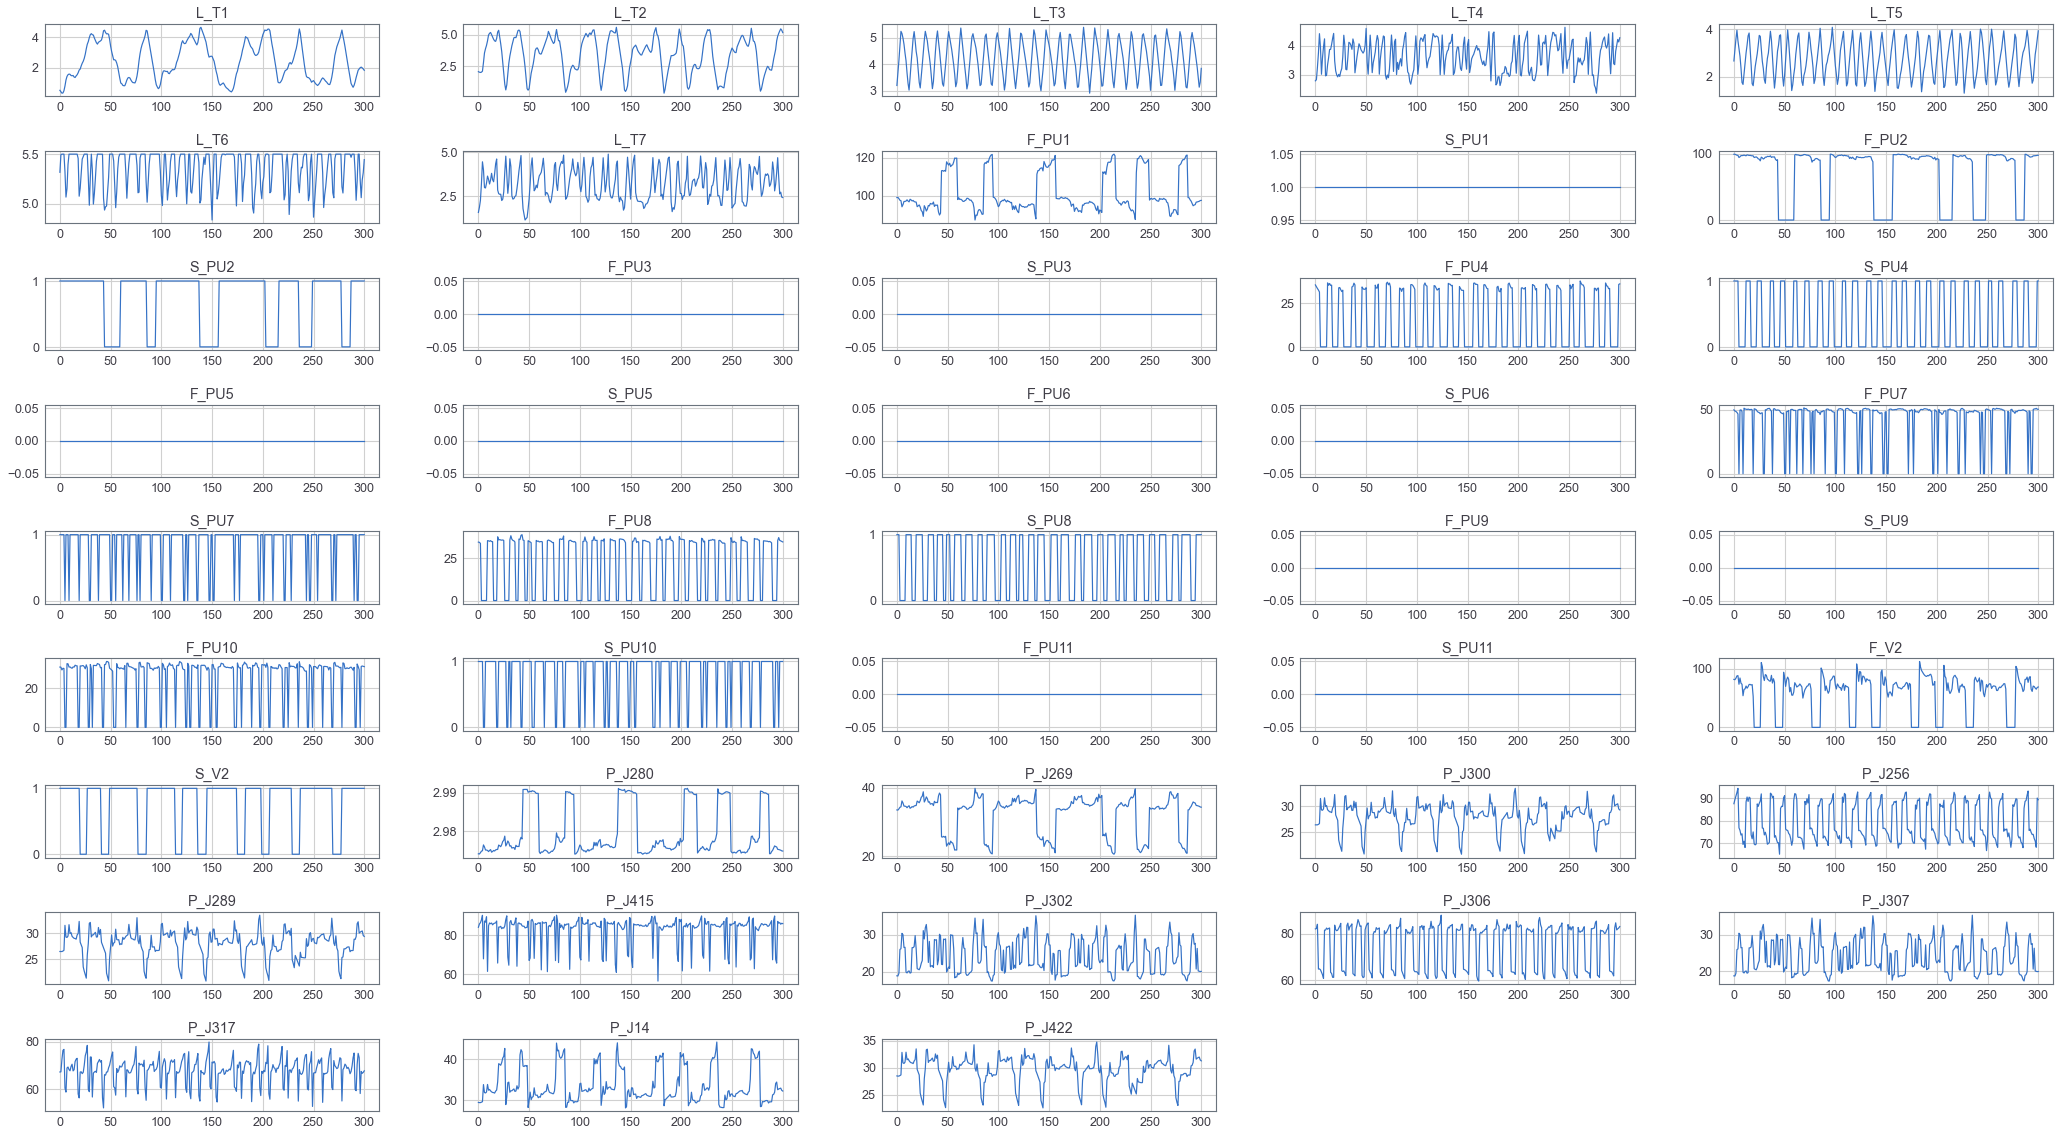

In [5]:
# to visualize patrial data
i = 1
plt.figure(figsize=(36, 20))
plt.subplots_adjust(wspace=0.25, hspace=0.75)
for col in list(new_training_data_noattack.columns):
    plt.subplot(9, 5, i)
    new_training_data_noattack.loc[:300, col].plot()
    plt.title(col)
    i += 1
plt.show()

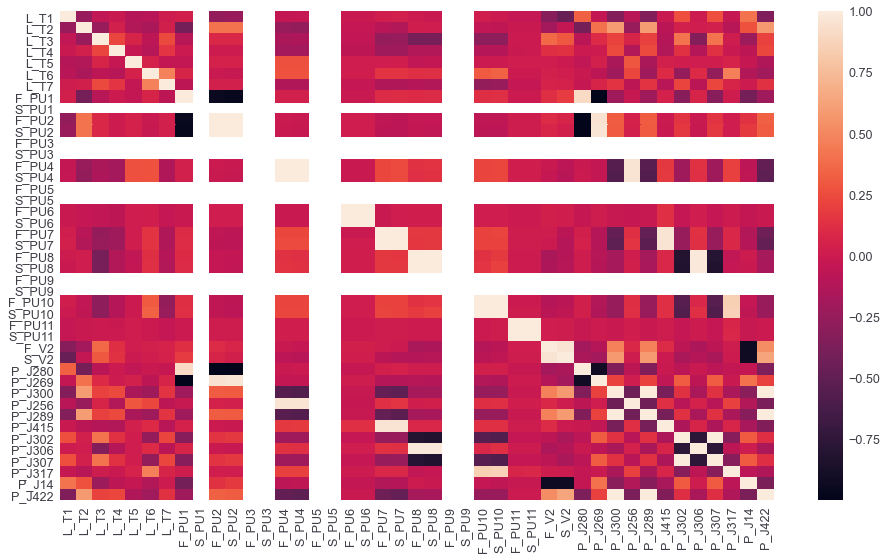

In [6]:
# to plot correlation matrix
corr = new_training_data_noattack.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, xticklabels=list(corr.columns), yticklabels=list(corr.columns))
plt.show()

Constants: ["S_PU1", "F_PU3", "S_PU3", "F_PU5", "S_PU5", "F_PU9", "S_PU9"]

## Sliding Window

In [7]:
def sliding_window(df, window_size, stride=1):
    N = np.floor((len(df) - window_size)/stride).astype(np.int)+1
    return_window = []
    for i in range(N):
        return_window.append(df[i*stride:i*stride+window_size])
    return np.array(return_window)

In [8]:
# training
window_size = 29

before_s_window = new_training_data_noattack.loc[:1000,'P_J269'].copy()
s_window = sliding_window(before_s_window, window_size=window_size, stride=1)

s_window_x = s_window[:, :window_size-1]
s_window_y = s_window[:, window_size-1]

rfr = RandomForestRegressor().fit(s_window_x, s_window_y)

In [9]:
# testing
test_before_s_window = test_data.loc[:1000,'P_J269'].copy()
test_s_window = sliding_window(test_before_s_window, window_size=window_size, stride=1)

test_window_x = test_s_window[:, :window_size-1]
test_window_y = test_s_window[:, window_size-1]

test_window_pred = rfr.predict(test_window_x)

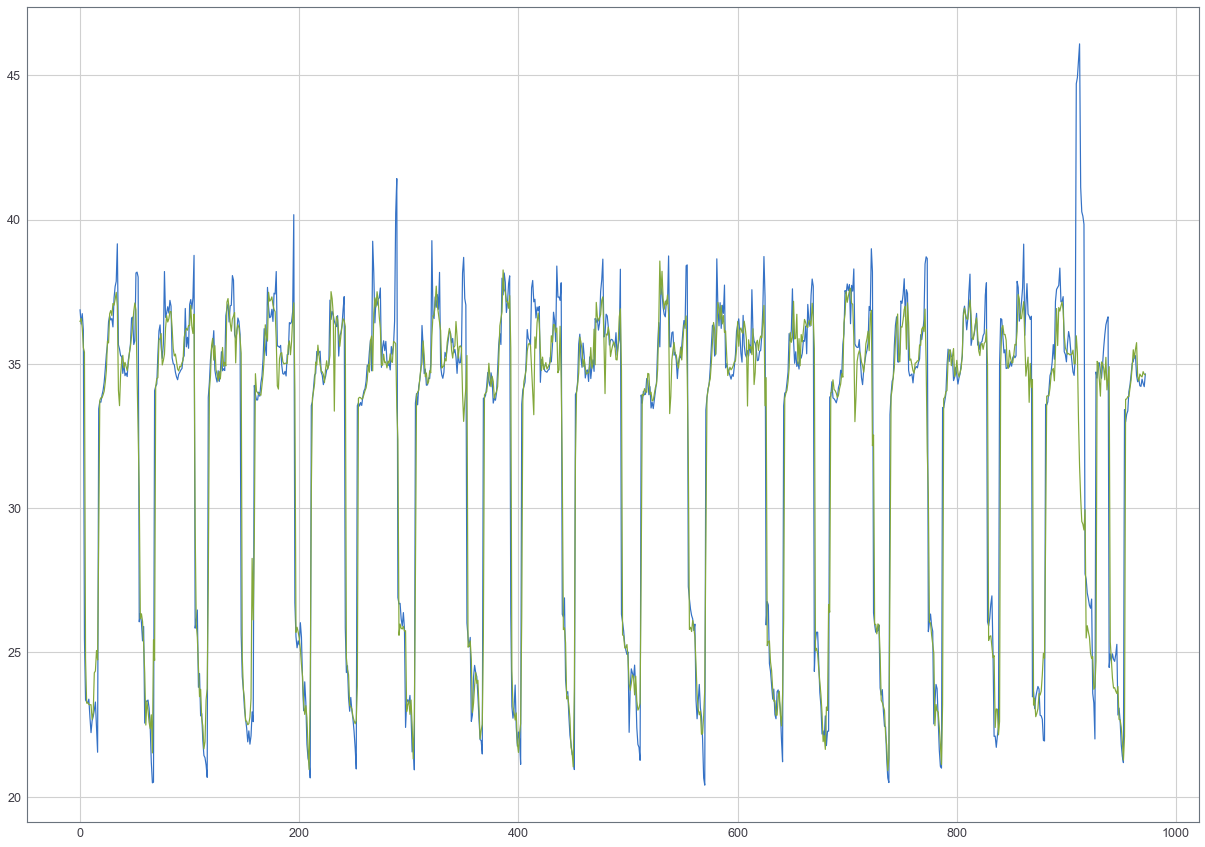

In [10]:
plt.figure(figsize=(21,15))
plt.plot(np.arange(len(test_window_y)), test_window_y)
plt.plot(np.arange(len(test_window_pred)), test_window_pred)
plt.show()